In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 0. Загрузка, предобработка и визуализация обучающих и тестовых данных

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [3]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [5]:
print( y_train.shape, y_test.shape)

(50000, 1) (10000, 1)


In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train / 255.0
X_test = X_test / 255.0

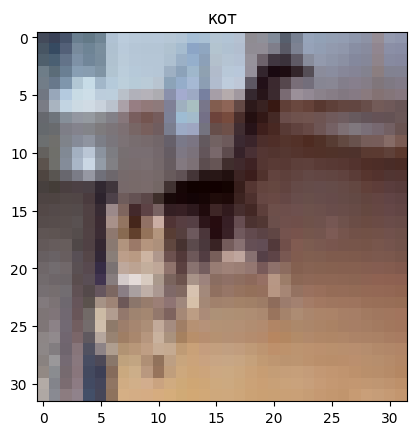

In [7]:
N = np.random.randint(0, X_test.shape[0] + 1)

plt.imshow(X_test[N])
plt.title(classes[np.argmax(y_test[N,:])])
plt.show()

# 1. Базовое решение

In [8]:
num_classes = len(classes)
num_epochs = 5
batch_size = 128

In [9]:
base_model = Sequential()

base_model.add(Conv2D(6, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Conv2D(12, kernel_size=(3, 3), padding='same', activation='relu'))
base_model.add(MaxPooling2D(pool_size=(2, 2)))

base_model.add(Flatten())
base_model.add(Dense(512, activation='relu'))
base_model.add(Dense(num_classes, activation='softmax'))

base_model.summary()

base_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         1158      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 12)        660       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 12)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 512)               3

In [10]:
history = base_model.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

Epoch 1/5
391/391 [==============================] - 7s 8ms/step - loss: 1.6533 - accuracy: 0.4065 - val_loss: 1.4636 - val_accuracy: 0.4763
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 1.3727 - accuracy: 0.5127 - val_loss: 1.2843 - val_accuracy: 0.5501
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 1.2388 - accuracy: 0.5636 - val_loss: 1.2347 - val_accuracy: 0.5660
Epoch 4/5
391/391 [==============================] - 3s 7ms/step - loss: 1.1389 - accuracy: 0.5970 - val_loss: 1.1801 - val_accuracy: 0.5878
Epoch 5/5
391/391 [==============================] - 3s 6ms/step - loss: 1.0566 - accuracy: 0.6282 - val_loss: 1.1324 - val_accuracy: 0.6046


In [11]:
loss, metric = base_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1324 - accuracy: 0.6046


In [12]:
stata = pd.DataFrame(columns=['Название модели',
                              'Кол-во сверточных слоев',
                              'Кол-во фильтров',
                              'Accuracy test'
                              ])

In [13]:
stata = stata.append({'Название модели': 'Базовое решение',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 12 + 6,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046


In [14]:
y_pred = base_model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


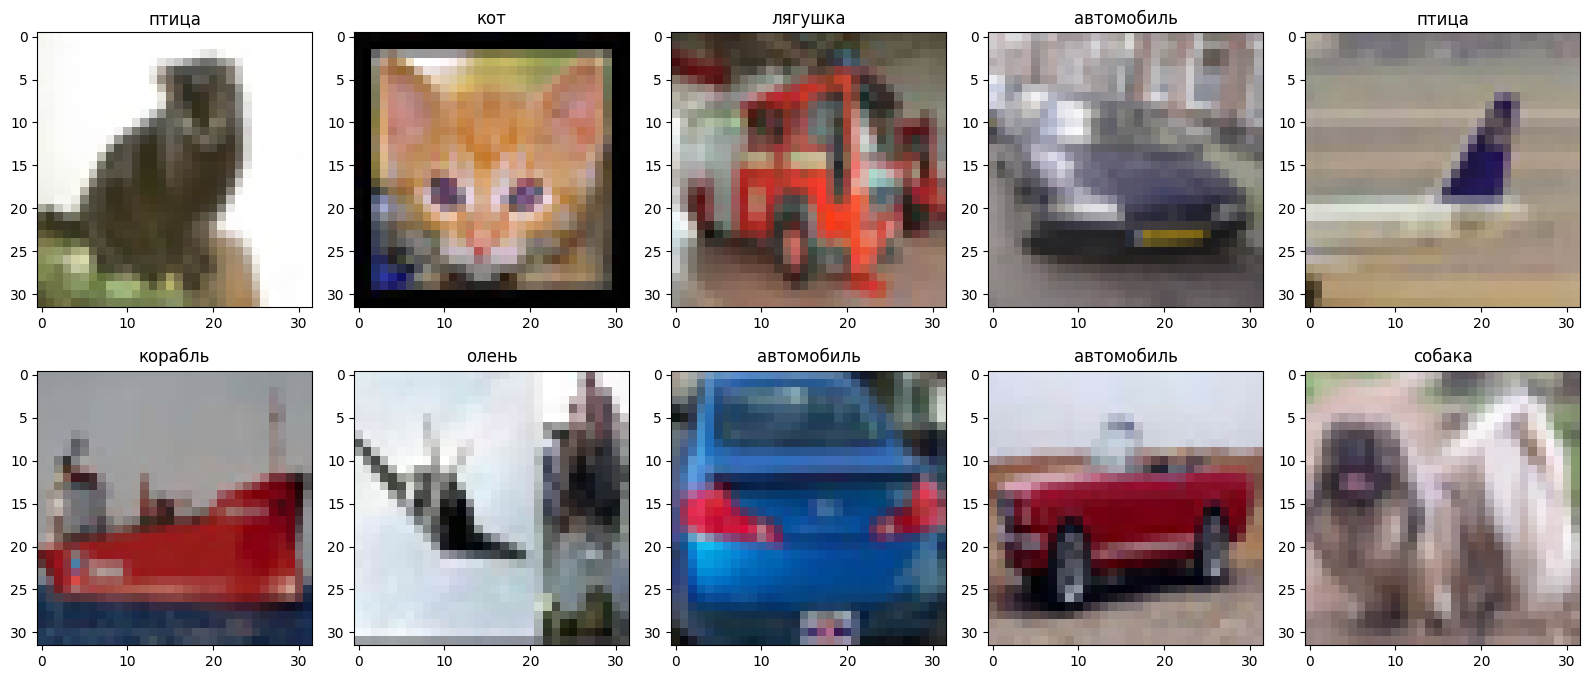

In [15]:
NN = np.random.randint(0, X_test.shape[0] + 1, num_classes)

plt.figure(figsize=(16,7))

for i, nn in enumerate(NN):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[nn])
    plt.title(classes[np.argmax(y_pred[nn,:])])
    plt.tight_layout();

# 2. Увеличение ширины сети (количества фильтров)

# 2.1 Сеть model_1

In [16]:
model_1 = Sequential()

model_1.add(Conv2D(12, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(24, kernel_size=(3, 3), padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.summary()

model_1.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 12)        2316      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 12)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 24)        2616      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 24)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

In [17]:
history = model_1.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_1.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 5s 8ms/step - loss: 1.5595 - accuracy: 0.4384 - val_loss: 1.3580 - val_accuracy: 0.5116
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 1.2546 - accuracy: 0.5571 - val_loss: 1.2126 - val_accuracy: 0.5711
Epoch 3/5
391/391 [==============================] - 3s 6ms/step - loss: 1.1064 - accuracy: 0.6106 - val_loss: 1.1223 - val_accuracy: 0.6026
Epoch 4/5
391/391 [==============================] - 3s 6ms/step - loss: 0.9978 - accuracy: 0.6497 - val_loss: 1.1285 - val_accuracy: 0.6082
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.0355 - accuracy: 0.6346


In [18]:
stata = stata.append({'Название модели': 'Модель №1',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 12 + 24,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346


# 2.2 Сеть model_2

In [19]:
model_2 = Sequential()

model_2.add(Conv2D(24, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(48, kernel_size=(3, 3), padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.summary()

model_2.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 24)        4632      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 24)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 48)        10416     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 48)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [20]:
history = model_2.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_2.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 5s 9ms/step - loss: 1.5483 - accuracy: 0.4451 - val_loss: 1.3153 - val_accuracy: 0.5290
Epoch 2/5
391/391 [==============================] - 3s 8ms/step - loss: 1.2017 - accuracy: 0.5781 - val_loss: 1.1771 - val_accuracy: 0.5827
Epoch 3/5
391/391 [==============================] - 4s 9ms/step - loss: 1.0346 - accuracy: 0.6359 - val_loss: 1.0462 - val_accuracy: 0.6289
Epoch 4/5
391/391 [==============================] - 3s 7ms/step - loss: 0.9085 - accuracy: 0.6817 - val_loss: 1.0331 - val_accuracy: 0.6388
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.9590 - accuracy: 0.6655


In [21]:
stata = stata.append({'Название модели': 'Модель №2',
                     'Кол-во сверточных слоев': 2,
                     'Кол-во фильтров': 24 + 48,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346
2,Модель №2,2,72,0.6655


# 3. Увеличение глубины сети (количества слоев)

# 3.1 Сеть model_3

In [22]:
model_3 = Sequential()

model_3.add(Conv2D(4, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(6, kernel_size=(6, 6), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Conv2D(8, kernel_size=(3, 3), padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.summary()

model_3.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 4)         772       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 4)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 6)         870       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 6)           0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           440       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 8)          

In [23]:
history = model_3.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_3.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 6s 8ms/step - loss: 1.7929 - accuracy: 0.3449 - val_loss: 1.5996 - val_accuracy: 0.4230
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 1.5353 - accuracy: 0.4462 - val_loss: 1.4757 - val_accuracy: 0.4707
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 1.4444 - accuracy: 0.4803 - val_loss: 1.3963 - val_accuracy: 0.4977
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 1.3748 - accuracy: 0.5070 - val_loss: 1.3501 - val_accuracy: 0.5146
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.3386 - accuracy: 0.5231


In [24]:
stata = stata.append({'Название модели': 'Модель №3',
                     'Кол-во сверточных слоев': 3,
                     'Кол-во фильтров': 4 + 6 + 8,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346
2,Модель №2,2,72,0.6655
3,Модель №3,3,18,0.5231


# 3.2 Сеть model_4

In [25]:
model_4 = Sequential()

model_4.add(Conv2D(3, kernel_size=(8, 8), padding='same', activation='relu', input_shape=X_train.shape[1:]))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(4, kernel_size=(6, 6), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(5, kernel_size=(5, 5), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Conv2D(6, kernel_size=(3, 3), padding='same', activation='relu'))
model_4.add(MaxPooling2D(pool_size=(2, 2)))

model_4.add(Flatten())
model_4.add(Dense(512, activation='relu'))
model_4.add(Dense(num_classes, activation='softmax'))

model_4.summary()

model_4.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 3)         579       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 3)         0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 4)         436       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 4)           0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 5)           505       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 4, 4, 5)          

In [26]:
history = model_4.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_4.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 6s 8ms/step - loss: 1.9492 - accuracy: 0.2860 - val_loss: 1.7574 - val_accuracy: 0.3715
Epoch 2/5
391/391 [==============================] - 3s 7ms/step - loss: 1.7121 - accuracy: 0.3814 - val_loss: 1.6675 - val_accuracy: 0.4029
Epoch 3/5
391/391 [==============================] - 3s 7ms/step - loss: 1.6434 - accuracy: 0.4057 - val_loss: 1.6181 - val_accuracy: 0.4162
Epoch 4/5
391/391 [==============================] - 3s 6ms/step - loss: 1.6000 - accuracy: 0.4215 - val_loss: 1.5741 - val_accuracy: 0.4268
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.5282 - accuracy: 0.4513


In [27]:
stata = stata.append({'Название модели': 'Модель №4',
                     'Кол-во сверточных слоев': 4,
                     'Кол-во фильтров': 3 + 4 + 5 + 6,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346
2,Модель №2,2,72,0.6655
3,Модель №3,3,18,0.5231
4,Модель №4,4,18,0.4513


# 3.3 Дообучим сеть model_3 ещё на протяжении 5 эпох

In [28]:
history = model_3.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = model_3.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 4s 9ms/step - loss: 1.2922 - accuracy: 0.5396 - val_loss: 1.3125 - val_accuracy: 0.5286
Epoch 2/5
391/391 [==============================] - 2s 6ms/step - loss: 1.2551 - accuracy: 0.5530 - val_loss: 1.2748 - val_accuracy: 0.5471
Epoch 3/5
391/391 [==============================] - 2s 6ms/step - loss: 1.2258 - accuracy: 0.5651 - val_loss: 1.2607 - val_accuracy: 0.5534
Epoch 4/5
391/391 [==============================] - 2s 6ms/step - loss: 1.1854 - accuracy: 0.5790 - val_loss: 1.2385 - val_accuracy: 0.5546
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2624 - accuracy: 0.5504


In [29]:
stata = stata.append({'Название модели': 'Модель №3 (10 эпох)',
                     'Кол-во сверточных слоев': 3,
                     'Кол-во фильтров': 4 + 6 + 8,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346
2,Модель №2,2,72,0.6655
3,Модель №3,3,18,0.5231
4,Модель №4,4,18,0.4513
5,Модель №3 (10 эпох),3,18,0.5504


# 4. Полносвязная сеть

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
# вытягивание данных в вектор
X_train = X_train.reshape((-1, 32 * 32 * 3))
X_test = X_test.reshape((-1, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [32]:
dense_model = Sequential()
dense_model.add(Dense(256, input_shape=(32 * 32 * 3,), activation='relu'))
dense_model.add(Dense(128, activation='relu'))
dense_model.add(Dense(64, activation='relu'))
dense_model.add(Dense(num_classes, activation='sigmoid'))

dense_model.summary()

dense_model.compile(loss='categorical_crossentropy',
                   optimizer='Adam',
                   metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               786688    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 10)                650       
                                                                 
Total params: 828490 (3.16 MB)
Trainable params: 828490 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
history = dense_model.fit(X_train, y_train,
               epochs=num_epochs,
               batch_size=batch_size,
               validation_data=(X_test, y_test),
               verbose=1)

loss, metric = dense_model.evaluate(X_test, y_test)

Epoch 1/5
391/391 [==============================] - 5s 6ms/step - loss: 1.9089 - accuracy: 0.3114 - val_loss: 1.7672 - val_accuracy: 0.3613
Epoch 2/5
391/391 [==============================] - 2s 5ms/step - loss: 1.6996 - accuracy: 0.3901 - val_loss: 1.6305 - val_accuracy: 0.4238
Epoch 3/5
391/391 [==============================] - 2s 5ms/step - loss: 1.6208 - accuracy: 0.4208 - val_loss: 1.5934 - val_accuracy: 0.4331
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.5584 - accuracy: 0.4416 - val_loss: 1.5673 - val_accuracy: 0.4393
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 1.5530 - accuracy: 0.4431


In [34]:
stata = stata.append({'Название модели': 'Полносвязная сеть',
                     'Кол-во сверточных слоев': 0,
                     'Кол-во фильтров': 0,
                     'Accuracy test': metric},
                     ignore_index=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
0,Базовое решение,2,18,0.6046
1,Модель №1,2,36,0.6346
2,Модель №2,2,72,0.6655
3,Модель №3,3,18,0.5231
4,Модель №4,4,18,0.4513
5,Модель №3 (10 эпох),3,18,0.5504
6,Полносвязная сеть,0,0,0.4431


# 5. Выводы

In [35]:
stata.sort_values(['Accuracy test'], ascending=False, inplace=True)
stata

,Название модели,Кол-во сверточных слоев,Кол-во фильтров,Accuracy test
2,Модель №2,2,72,0.6655
1,Модель №1,2,36,0.6346
0,Базовое решение,2,18,0.6046
5,Модель №3 (10 эпох),3,18,0.5504
3,Модель №3,3,18,0.5231
4,Модель №4,4,18,0.4513
6,Полносвязная сеть,0,0,0.4431


1. Увеличение количества фильтров (свёрток) способствовало улучшению точности классификации модели;
2. Увеличение количества сверточных слоев ухудшило качество классификации модели;
3. Для обучения большего количества сверточных слоев требуется больше эпох обучения (модель №3, обученная на протяжении 10 эпох, показывает точность лучше, чем та же модель, обученная на протяжении 5 эпох);
4. Полносвязная ИНС прямого распространения показало точность классификации хуже, чем сверточные.